In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from scipy import stats
import inspect
from numpy import median
from scipy.stats import skew
from scipy.stats import boxcox_normmax
from scipy.special import boxcox1p
from sklearn.preprocessing import power_transform
from ipynb.fs.full.feature_engineering_final import DataLoader

In [22]:
train_data = pd.read_csv('train.csv')
train_data['SalePrice'] = np.log1p(train_data['SalePrice'])
sns.set(color_codes=True)
x = np.random.normal(size=100,scale=0.1,loc=0)
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in train_data.columns:
    if train_data[i].dtype in numeric_dtypes:
        train_data[i] = train_data[i].fillna(0)
        numerics2.append(i)

skew_features = train_data[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index
high_skew

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.674865
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
dtype: float64

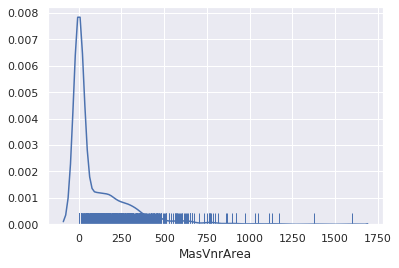

In [23]:
sns.distplot(train_data['MasVnrArea'], hist=False , kde=True,rug=True);

In [25]:
transformed = pd.DataFrame()
transformed2 = pd.DataFrame()
for i in skew_index:
    print(boxcox_normmax(train_data[i] + 1))
    transformed[i] = boxcox1p(train_data[i], boxcox_normmax(train_data[i] + 1))
    train_data[i] = boxcox1p(train_data[i], boxcox_normmax(train_data[i] + 1))
    transformed2[i] = train_data[i] + 1
transformed2     

0.02544625827662414
0.5368163707377352
-0.00934768621762675
0.03169428531781937
-0.0963540375384244
0.09849886892910105


/home/victor/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/victor/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3429: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


0.17922590803615707
0.428386927325976
-0.04475624475284085
0.37282130433465627
0.4174177776018605
0.45114561520277274
0.6675819938263883
0.6548189867547992
0.7836713124769246
0.19349343292995552
-0.08529436149170913
0.010543840809423118
0.5836446774598872
1.0689849557304023
0.5449748318676124
0.13233945683971154
1.1783855482196262
0.7802485244349986
0.9840131624710832


,MiscVal,PoolArea,LotArea,3SsnPorch,LowQualFinSF,KitchenAbvGr,BsmtFinSF2,ScreenPorch,BsmtHalfBath,EnclosedPorch,...,MSSubClass,1stFlrSF,GrLivArea,BsmtUnfSF,2ndFlrSF,OverallCond,TotRmsAbvGrd,HalfBath,Fireplaces,BsmtFullBath
0,1.000000,1.0,9.670456,1.000000,1.00000,1.717357,1.000000,1.000000,1.000000,1.000000,...,7.281283,6.133687,8.744830,31.319788,1274.318734,4.036931,3.550030,2.072004,1.000000,1.993848
1,1.000000,1.0,9.787628,1.000000,1.00000,1.717357,1.000000,1.000000,1.682506,1.000000,...,5.146687,6.348117,8.416976,45.696312,1.000000,5.241668,3.219433,1.000000,1.919485,1.000000
2,1.000000,1.0,9.933083,1.000000,1.00000,1.717357,1.000000,1.000000,1.000000,1.000000,...,7.281283,6.174048,8.791850,58.687345,1293.445964,4.036931,3.219433,2.072004,1.919485,1.993848
3,1.000000,1.0,9.782836,1.000000,1.00000,1.717357,1.000000,1.000000,1.000000,20.032389,...,7.622580,6.198336,8.749247,66.749917,1118.828804,4.036931,3.393721,1.000000,1.919485,1.993848
4,1.000000,1.0,10.150118,1.000000,1.00000,1.717357,1.000000,1.000000,1.000000,1.000000,...,7.281283,6.295030,9.016605,63.037608,1593.738738,4.036931,3.691934,2.072004,1.919485,1.993848
5,8.130450,1.0,10.140772,7.333015,1.00000,1.717357,1.000000,1.000000,1.000000,1.000000,...,6.891414,6.092759,8.499166,18.872762,821.488312,4.036931,3.022026,2.072004,1.000000,1.993848
6,1.000000,1.0,9.832760,1.000000,1.00000,1.717357,1.000000,1.000000,1.000000,1.000000,...,5.146687,6.506119,8.734668,48.760938,1.000000,4.036931,3.393721,1.000000,1.919485,1.993848
7,7.320371,1.0,9.859472,1.000000,1.00000,1.717357,5.861790,1.000000,1.000000,18.655187,...,7.281283,6.276512,8.962002,38.870089,1480.860216,4.463892,3.393721,2.072004,2.738588,1.993848
8,1.000000,1.0,9.373592,1.000000,1.00000,2.160257,1.000000,1.000000,1.000000,17.868268,...,6.891414,6.232467,8.784559,93.168813,1112.510580,4.036931,3.550030,1.000000,2.738588,1.000000
9,1.000000,1.0,9.550946,1.000000,1.00000,2.160257,1.000000,1.000000,1.000000,1.000000,...,10.110897,6.261398,8.246350,30.064017,1.000000,4.463892,3.022026,1.000000,2.738588,1.993848


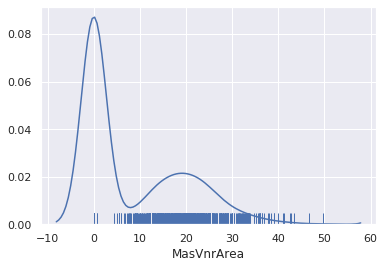

In [26]:
sns.distplot(train_data['MasVnrArea'], hist=False , kde=True,rug=True);

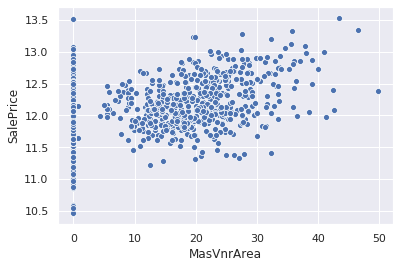

In [27]:
sns.scatterplot(train_data["MasVnrArea"], y=train_data["SalePrice"], data=transformed)

In [6]:
skew_features

PoolArea         20.176117
MiscVal          20.054543
LowQualFinSF     16.150628
3SsnPorch        12.511336
EnclosedPorch     4.664371
KitchenAbvGr      4.074860
BsmtFinSF2        4.038796
ScreenPorch       3.784349
BsmtHalfBath      3.779085
LotArea           3.112013
OpenPorchSF       2.685015
MasVnrArea        2.546947
WoodDeckSF        2.128569
1stFlrSF          1.556592
MSSubClass        1.345305
BsmtFinSF1        1.165130
GrLivArea         1.129240
BsmtUnfSF         0.918977
2ndFlrSF          0.911944
TotRmsAbvGrd      0.841731
Fireplaces        0.819015
TotalBsmtSF       0.804238
HalfBath          0.713993
BsmtFullBath      0.651195
OverallCond       0.448703
BedroomAbvGr      0.436174
GarageArea        0.295986
FullBath          0.295534
MoSold            0.182834
OverallQual       0.181010
YrSold            0.168813
Id                0.000000
GarageCars       -0.109880
LotFrontage      -0.280686
YearRemodAdd     -0.399495
YearBuilt        -0.587052
GarageYrBlt      -3.947954
d

In [7]:
transformed2 = pd.DataFrame(data = power_transform(transformed2, method='box-cox'),columns = transformed2.columns)

In [ ]:
sns.distplot(transformed2['PoolArea'], hist=False , kde=True,rug=True);

In [2]:
concat_data = pd.concat([pd.read_csv('train.csv').drop(['Id','SalePrice'],axis = 1),pd.read_csv('test.csv').drop(['Id'],axis = 1)])
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in concat_data.columns:
    if concat_data[i].dtype in numeric_dtypes:
        #concat_data[i] = concat_data[i].fillna(0)
        numerics2.append(i)

skew_features = concat_data[numerics2].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index
high_skew
skew_features

MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.145323
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.929996
MasVnrArea        2.601240
OpenPorchSF       2.535114
WoodDeckSF        1.842433
LotFrontage       1.502351
1stFlrSF          1.469604
BsmtFinSF1        1.424989
MSSubClass        1.375457
GrLivArea         1.269358
TotalBsmtSF       1.162285
BsmtUnfSF         0.919351
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
BsmtFullBath      0.623741
OverallCond       0.570312
BedroomAbvGr      0.326324
GarageArea        0.241176
OverallQual       0.197110
MoSold            0.195884
FullBath          0.167606
YrSold            0.132399
GarageCars       -0.218260
GarageYrBlt      -0.381942
YearRemodAdd     -0.451020
YearBuilt        -0.599806
dtype: float64

In [3]:
dl = DataLoader("train.csv","test.csv")

1453
1459


/home/victor/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/victor/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3429: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


In [5]:
dl.getX_test()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,4.244154,RH,17.815119,14.564673,Pave,NaN,Reg,Lvl,AllPub,Inside,...,19.098157,0.0,NaN,MnPrv,NaN,0.000000,6,2010,WD,Normal
1,4.244154,RL,17.945030,15.037943,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0.000000,0.0,NaN,NaN,Gar2,10.250962,6,2010,WD,Normal
2,6.487865,RL,17.019491,14.965587,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0.000000,0.0,NaN,MnPrv,NaN,0.000000,3,2010,WD,Normal
3,6.487865,RL,17.553045,14.218177,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0.000000,0.0,NaN,NaN,NaN,0.000000,6,2010,WD,Normal
4,8.213854,RL,12.322723,12.707862,Pave,NaN,IR1,HLS,AllPub,Inside,...,21.042313,0.0,NaN,NaN,NaN,0.000000,1,2010,WD,Normal
5,6.487865,RL,17.154093,14.223147,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0.000000,0.0,NaN,NaN,NaN,0.000000,4,2010,WD,Normal
6,4.244154,RL,NaN,13.718915,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0.000000,0.0,NaN,GdPrv,Shed,6.564871,3,2010,WD,Normal
7,6.487865,RL,15.479825,13.833182,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0.000000,0.0,NaN,NaN,NaN,0.000000,5,2010,WD,Normal
8,4.244154,RL,18.457474,14.262555,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.000000,0.0,NaN,NaN,NaN,0.000000,2,2010,WD,Normal
9,4.244154,RL,16.472568,13.832653,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0.000000,0.0,NaN,MnPrv,NaN,0.000000,4,2010,WD,Normal
